# Analysis of PISA 2012 Data
## by Gabriela Sikora

## Investigation Overview

In this investigation, I am looking to answer 2 questions:
- Is there a relationship between the amount of time a student dedicates to learning and their score? 
- Are there differences in achievement based on gender or parental education levels?

To do this, I will look at variables related to in school and out of school study times, their gender, and their parental levels of education.

## Dataset Overview

The dataset that I used for this project was the PISA 2012 dataset. PISA, in particular, is a "survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school" (Udacity, 2019).

This dataset that we will look at holds information about 15167 students with 19 attributes. These include variables related to the type of Out-of-School Study Time they take part in, how much Learning Time they spend on a subject within school, their average subject related Scores, their Gender, and their parents highest level of Education.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Load in the cleaned csv that was created in the wrangle_pisa notebook
pisa = pd.read_csv('pisa_df.csv')

# Set up variables for colors to be used in plotting
color1 = '#a7d7c5'
color2 = '#74b49b'
color3 = '#5c8d89'
color_male = '#ff8162' 
color_female = '#ffcd60'
color_gends = ['#ffcd60', '#ff8162']
line = '#ff8000'

In [3]:
# Convert parental level of education into ordered categorical types
ordinal_var_dict = {'Education - Father': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent'],
                    'Education - Mother': ['Early childhood', 'Primary', 'Lower secondary', 'Upper secondary', 'Post-secondary', 'Short-cycle tertiary', 'Bachelor’s or equivalent']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    pisa[var] = pisa[var].astype(ordered_var)

## Scores vs. Total Study and Learning Times

We can start off by comparing the amount of time a student puts into their studies and the score they achieved. There ended up being practically no relationship between the Learning Time - Total, the Out-of-School Study Time - Total, and each of the Score metrics. This immediately hinted at the answer: there is no relationship between time spent learning and the ultimate score.

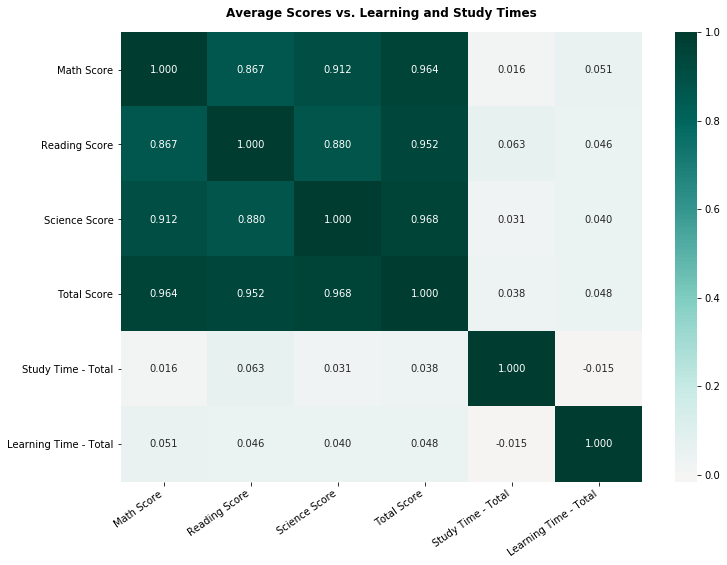

In [4]:
numeric_vars = ['Average Math Score', 
                'Average Reading Score', 
                'Average Science Score', 
                'Average Total Score', 
                'Out-of-School Study Time - Total', 
                'Learning Time - Total']

short_n_vars = ['Math Score', 
                'Reading Score', 
                'Science Score', 
                'Total Score', 
                'Study Time - Total', 
                'Learning Time - Total']

# Correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(pisa[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)

plt.title('Average Scores vs. Learning and Study Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(numeric_vars), 1), short_n_vars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(numeric_vars), 1), short_n_vars, ha='right')
plt.show();

## Scores vs. Learning Times

Let's break down the Learning Time variables. It became obvious that Learning Time - Science was the variable that raised the Learning Time - Total. It had an average positive correlation of 0.093 between it and the Score variables, and this is enough to classify it as a weak positive correlation. 

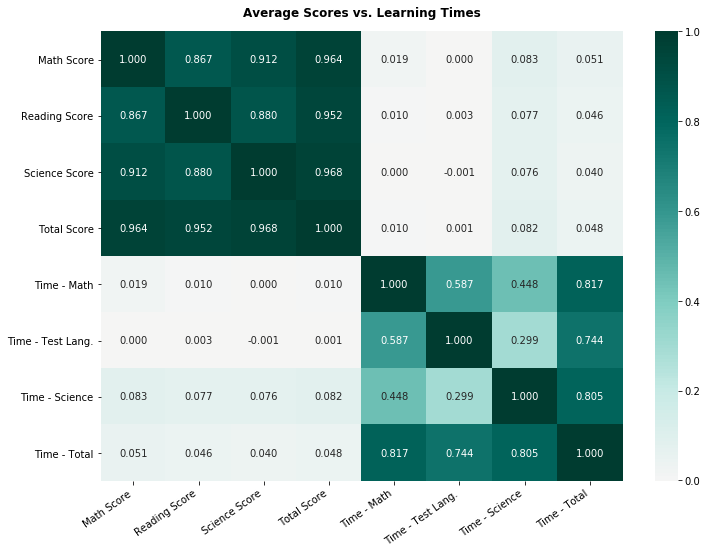

In [5]:
score_learn_vars = ['Average Math Score', 
                    'Average Reading Score', 
                    'Average Science Score', 
                    'Average Total Score', 
                    'Learning Time - Mathematics',
                    'Learning Time - Test Language', 
                    'Learning Time - Science', 
                    'Learning Time - Total']

short_sl_vars = ['Math Score', 
                 'Reading Score', 
                 'Science Score', 
                 'Total Score', 
                 'Time - Math',
                 'Time - Test Lang.', 
                 'Time - Science', 
                 'Time - Total']

# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
sb.heatmap(pisa[score_learn_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.title('Average Scores vs. Learning Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(score_learn_vars), 1), short_sl_vars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(score_learn_vars), 1), short_sl_vars, ha='right')
plt.show();

## Average Total Score vs. Learning Time for Science across Mother's Education Levels

When looking at the effect of Learning Time for Science vs. the Average Total Score, it becomes clear that the Learning Time - Science variable had this weak positive correlation only when it came to higher levels of parental education. When it comes to the levels of Maternal education under post-secondary, we can see that this effect disappears. 

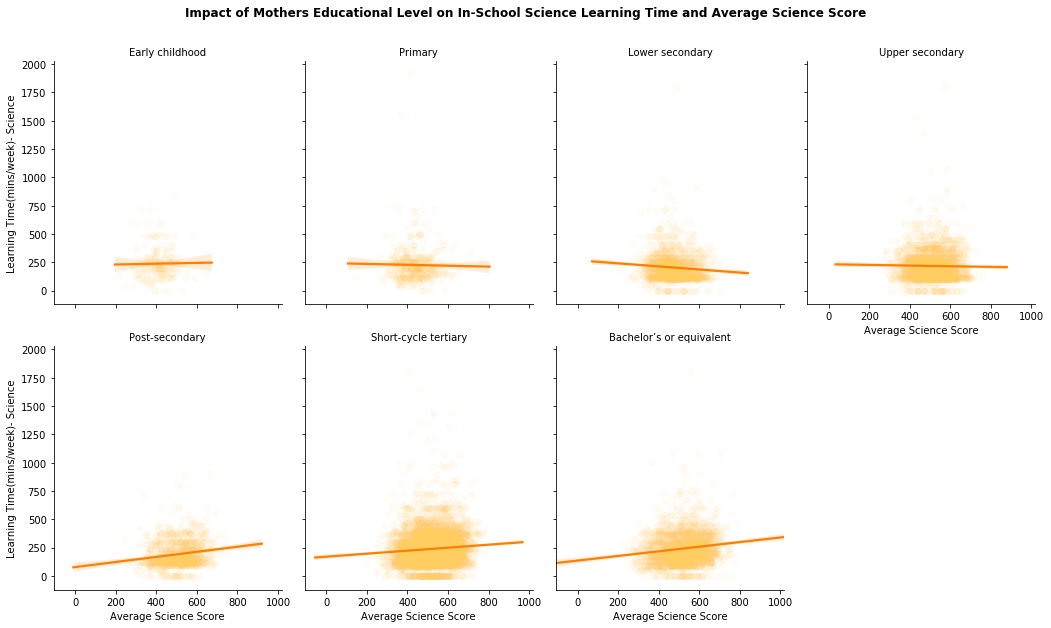

In [6]:
# Faceted scatter plots on levels of mother's education
g = sb.FacetGrid(data = pisa, 
                 col = 'Education - Mother', 
                 col_wrap = 4, 
                 height = 8.27/2, 
                 aspect = (14.70/4)/(8.27/2))
g.map(sb.regplot, 'Average Science Score', 'Learning Time - Science', 
      color = color_female,  
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": line})
g.set_xlabels('Average Science Score')
g.set_ylabels('Learning Time(mins/week)- Science')
g.set_titles('{col_name}')
plt.suptitle("Impact of Mothers Educational Level on In-School Science Learning Time and Average Science Score", 
             y = 1.05, 
             fontweight = 'semibold' )

plt.show()

## Average Scores vs. Out-of-School Study Times

As for the Out-of-School Study Time variables, almost all of them showed a weak negative correlation. The one variable that did not show a weak negative correlation was Out-of-School Study Time - Homework. This variable actually had an average positive correlation of 0.237 between it and the Score variables. This indicated that although homework is a positive indicator for a student's score, Out-of-School Study Time is in general not a very good metric for predicting the success of a student's score.

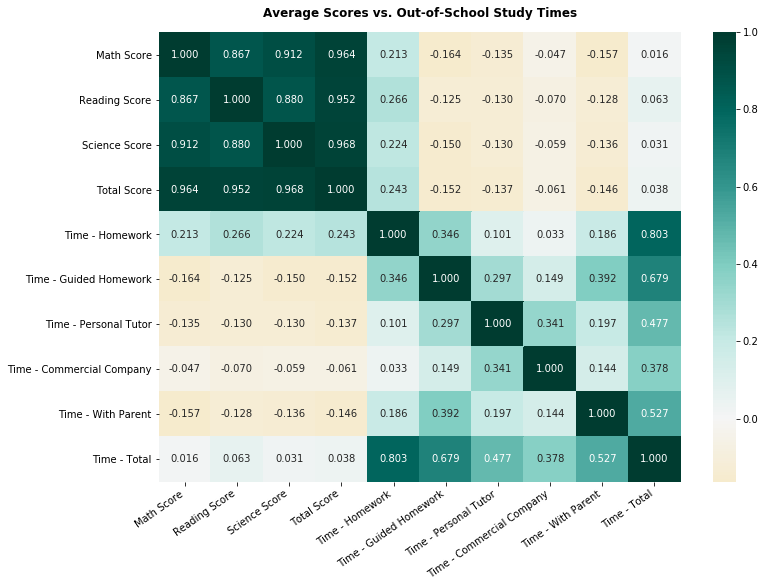

In [7]:
score_study_vars = ['Average Math Score', 'Average Reading Score', 'Average Science Score', 
                    'Average Total Score', 'Out-of-School Study Time - Homework',
                    'Out-of-School Study Time - Guided Homework',
                    'Out-of-School Study Time - Personal Tutor',
                    'Out-of-School Study Time - Commercial Company',
                    'Out-of-School Study Time - With Parent', 
                    'Out-of-School Study Time - Total']
short_vars = ['Math Score', 
              'Reading Score', 
              'Science Score', 
              'Total Score', 
              'Time - Homework',
              'Time - Guided Homework',
              'Time - Personal Tutor',
              'Time - Commercial Company',
              'Time - With Parent', 
              'Time - Total']

# correlation plot
plt.figure(figsize=[ 11.69, 8.27])
g = sb.heatmap(pisa[score_study_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'BrBG', center = 0)
plt.title('Average Scores vs. Out-of-School Study Times', pad = 15, fontweight = 'semibold')
plt.xticks(np.arange(0.5,len(score_study_vars), 1), short_vars, ha='right', rotation=35)
plt.yticks(np.arange(0.5,len(score_study_vars), 1), short_vars, ha='right')
plt.show()

## Average Total Score vs. Study Time for Homework across Mother's Education Levels

Here we have a very clear relationship that indicates that the more time a student spends on Homework, the higher their Total Score will be. This is applicable for each educational level for the mother, and it is quite a big contrast to all the other Out-of-School Study Time variables. 

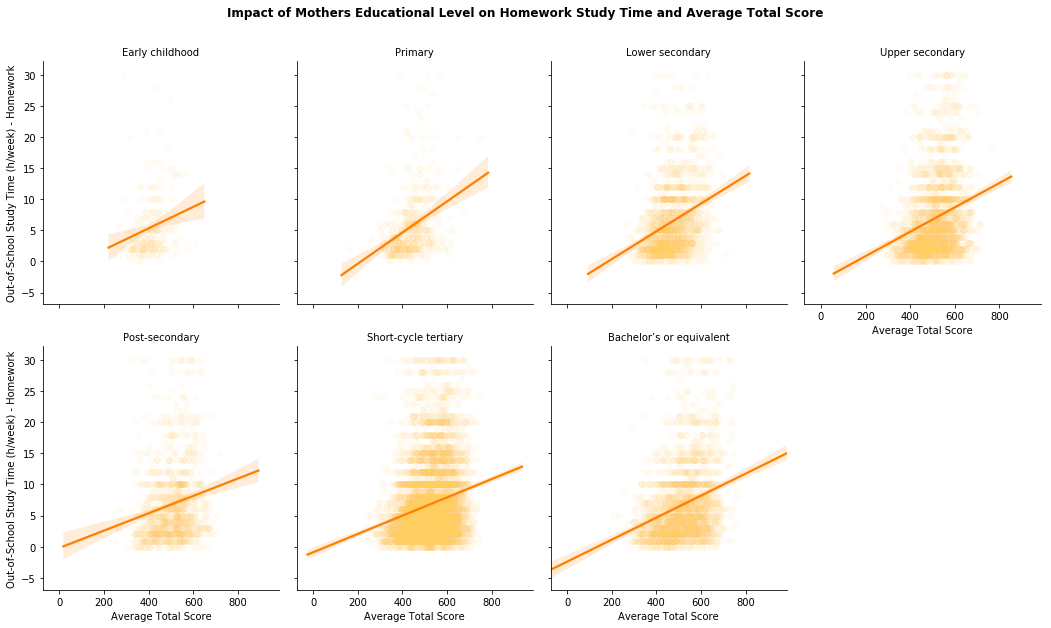

In [8]:
# Faceted heat maps on levels of father's education
g = sb.FacetGrid(data = pisa, 
                 col = 'Education - Mother', 
                 col_wrap = 4,
                 height = 8.27/2, 
                 aspect = (14.70/4)/(8.27/2))
g.map(sb.regplot, 'Average Total Score', 'Out-of-School Study Time - Homework', 
      color = color_female,
      x_jitter = 0.3,
      scatter_kws = {'alpha' : 1/20}, 
      line_kws={"color": line})
g.set_xlabels('Average Total Score')
g.set_ylabels('Out-of-School Study Time (h/week) - Homework')
g.set_titles('{col_name}')
plt.suptitle("Impact of Mothers Educational Level on Homework Study Time and Average Total Score", 
             y = 1.05, 
             fontweight = 'semibold' )

plt.show()

## Average Total Score across Mother's and Father's Education Levels

Here we can see that the student scores grow with the education level of the parent, regardless of the gender of the parent, until a point where it seems to plateau at upper-secondary education.

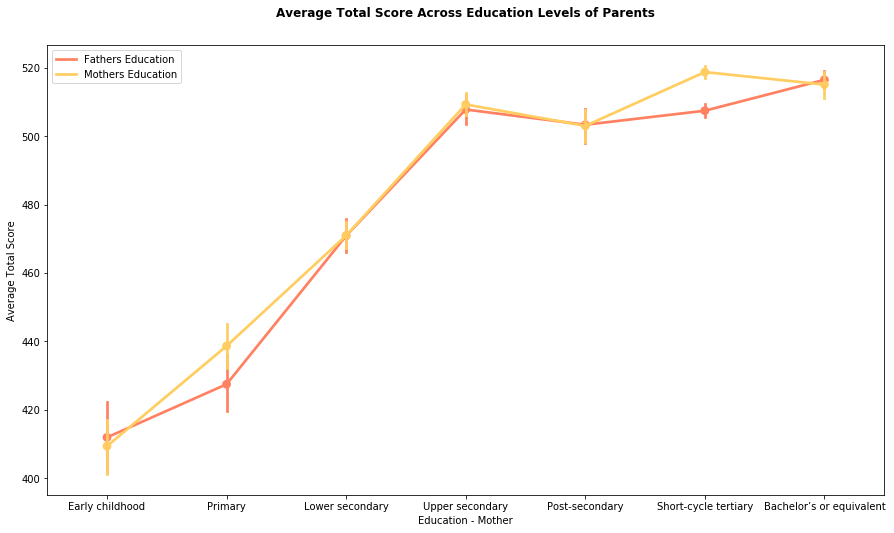

In [ ]:
# Score averages of students vs education levels of Father
plt.figure(figsize=[15, 8.27])
sb.pointplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
             color = color_male)

# Score averages of students vs education levels of Mother
sb.pointplot(data = pisa, 
              x = 'Education - Mother', 
              y = 'Average Total Score',
              color = color_female)

plt.title('Average Total Score Across Education Levels of Parents', y = 1.05, fontweight = 'semibold')

# Set legend
plt.legend(labels=['Fathers Education', 'Mothers Education'])
# https://stackoverflow.com/questions/23698850/manually-set-color-of-points-in-legend
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[0].set_color(color_male)
leg.legendHandles[1].set_color(color_female);

## Average Total Score between Genders across Father's Education Level

Now, we can see another perspective on the distribution between Average Total Score and the Father's Education Level. In addition to that, we can observe differences between the student's gender. Although there are discrepancies between the genders at the primary education level, generally the differences are not significant enough to make any conclusions. We can however see the amount of outliers in this box plot, which indicate that students with parents from higher educational levels might, on average, outperform students with parents from lower educational levels, but  there are nevertheless students with parents from higher educational levels that perform worse than all of the students with parents from lower educational levels. 

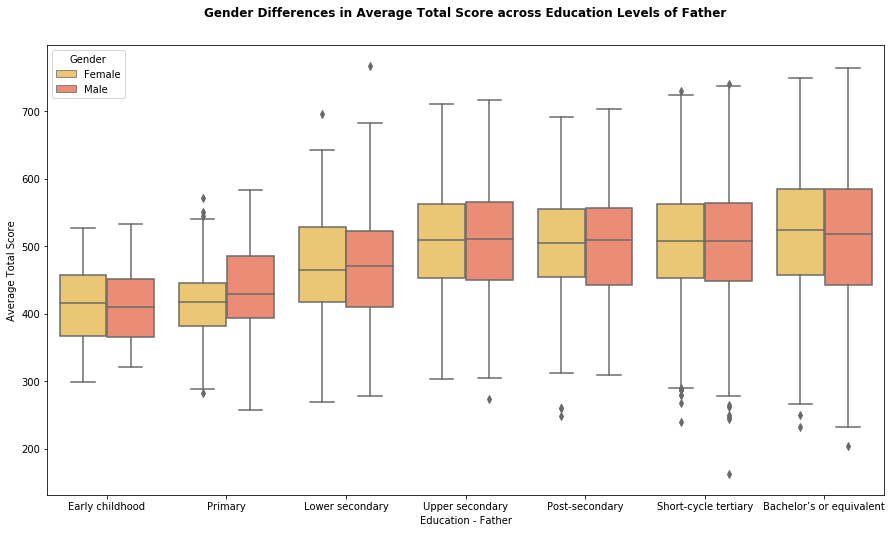

In [ ]:
plt.figure(figsize=[15, 8.27])
sb.boxplot(data = pisa, 
              x = 'Education - Father', 
              y = 'Average Total Score',
              hue = 'Gender',
              palette = color_gends)
plt.title('Gender Differences in Average Total Score across Education Levels of Father', y = 1.05, fontweight = 'semibold');


> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

### Thank you!

In [ ]:
!jupyter nbconvert "pisa_slide_deck.ipynb" --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook pisa_slide_deck.ipynb to slides
[NbConvertApp] Writing 960995 bytes to pisa_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/pisa_slide_deck.slides.html
Use Control-C to stop this server
